# Other procedures to generate XY masks

In [2]:
from diffractio import plt, np, mm, degrees, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields

from diffractio.diffractio import Diffractio

## Adding masks

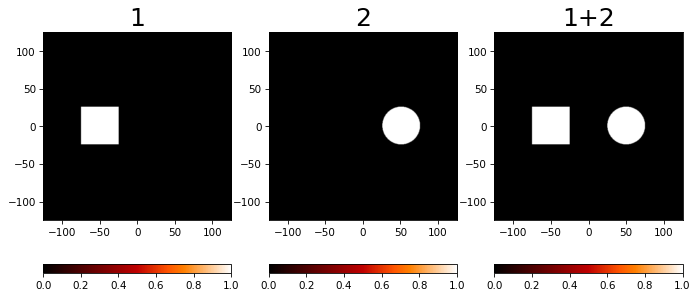

In [2]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(-50 * um, 0 * um), size=(50 * um, 50 * um), angle=0 * degrees)

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(r0=(50 * um, 0 * um), radius=(25 * um, 25 * um), angle=0 * degrees)

t3 = t2 + t1

draw_several_fields([t1, t2, t3], titles=["1", "2", "1+2"])

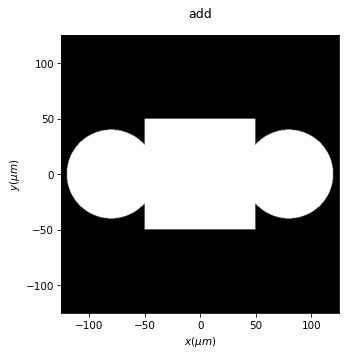

In [3]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(0 * um, 0 * um), size=(100 * um, 100 * um), angle=0 * degrees)

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(r0=(80 * um, 0 * um), radius=(40 * um, 40 * um), angle=0 * degrees)

t3 = Scalar_mask_XY(x, y, wavelength)
t3.circle(r0=(-80 * um, 0 * um), radius=(40 * um, 40 * um), angle=0 * degrees)

t4 = t2.add(t1, "mask")
t5 = t4.add(t3, "mask")
t5.draw(title="add")

## Substracting masks

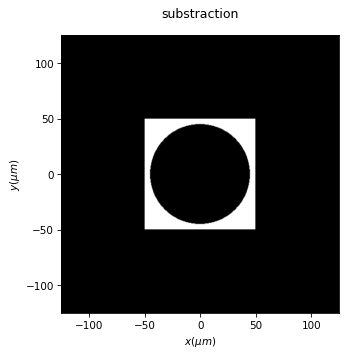

In [4]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(0 * um, 0 * um), size=(100 * um, 100 * um), angle=0 * degrees)

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(r0=(0 * um, 0 * um), radius=(45 * um, 45 * um), angle=0 * degrees)

t3 = t2 - t1
t3.draw(title="substraction")

## Binarization of a previous mask

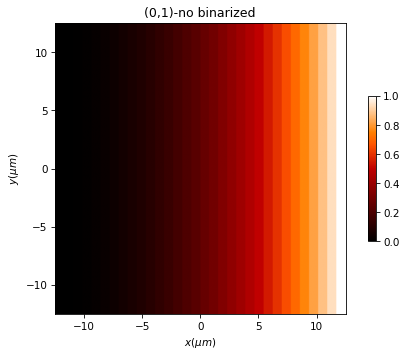

In [5]:
num_data = 512
length = 25 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.gray_scale(num_levels=32, level_min=0, level_max=1)
t1.draw(kind="intensity", has_colorbar="vertical")
plt.title("(0,1)-no binarized")

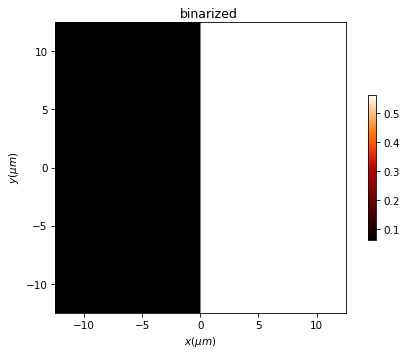

In [6]:
t1.binarize(
    kind="amplitude",
    bin_level=None,
    level0=0.25,
    level1=0.75,
    new_field=False,
    matrix=False,
)
t1.draw(kind="intensity", has_colorbar="vertical")
plt.suptitle("binarized")

## Widen the shape of a previous mask

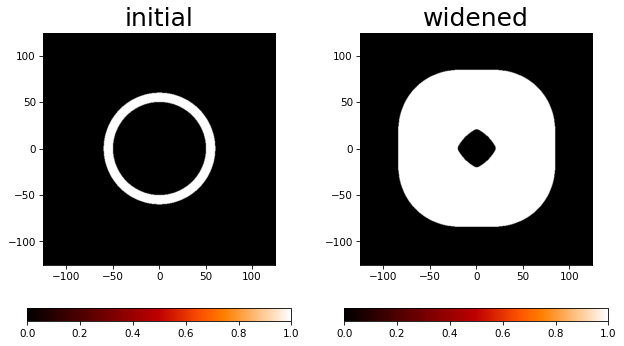

In [ ]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.ring(
    r0=(0 * um, 0 * um),
    radius1=(50 * um, 50 * um),
    radius2=(60 * um, 60 * um),
    angle=45 * degrees,
)

t2 = t1.widen(radius=10 * um, new_field=True, binarize=True)

draw_several_fields((t1, t2), titles=("initial", "widened"))

## Get the edges from a previous mask

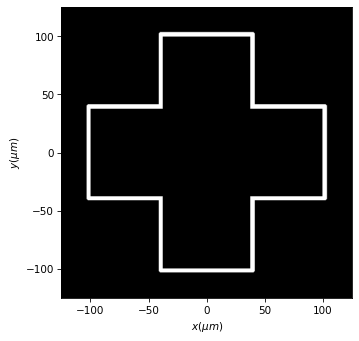

In [8]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.cross(r0=(0 * um, 0 * um), size=(200 * um, 75 * um), angle=0 * degrees)
t1.make_edge(edge_size=4*um, filter='square', new_field=False)
t1.draw(kind="intensity")

## Pupil for a mask 

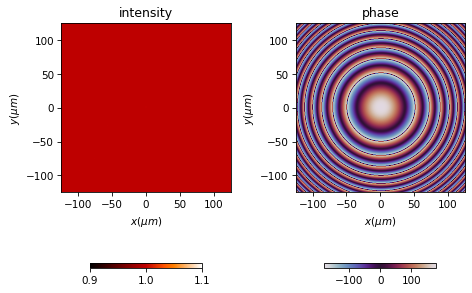

In [12]:
size = 250 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

wavelength = 0.6328 * um

##without a pupil

focal = 2 * mm
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(r0=(0 * um, 0 * um),  focal=focal)
lens.draw("field")


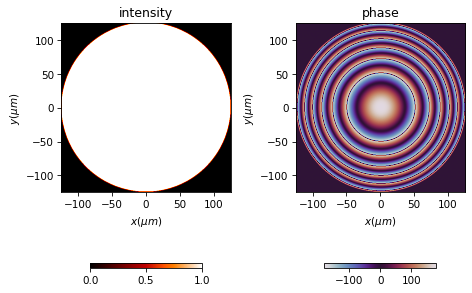

In [17]:

## with a pupil
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(r0=(0 * um, 0 * um),  focal=focal)
lens.pupil()
lens.draw("field", percentage_intensity=0.1)


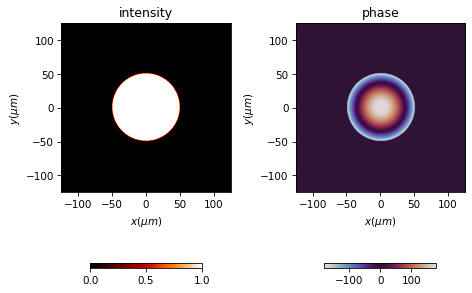

In [18]:

## with a pupil of a given radius
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(r0=(0 * um, 0 * um),  focal=focal)
lens.pupil(radius=50 * um)
lens.draw("field", percentage_intensity=0.1)


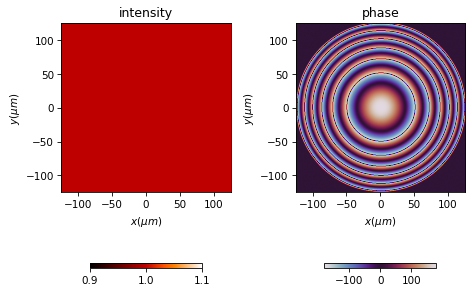

In [ ]:

## the masks allows to pass light, but removes the field outside the pupil
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(r0=(0 * um, 0 * um),  focal=focal)
lens.pupil(kind='inverse')
lens.draw("field", percentage_intensity=0.1)

## Mask from surface functions

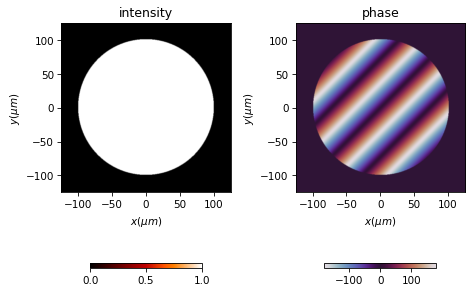

In [9]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.mask_from_function(
    r0=(0 * um, 0 * um),
    index=1.5,
    f1="1*degrees*self.Y",
    f2="1*degrees*self.X",
    v_globals=None,
    radius=(100 * um, 100 * um),
)
t1.draw(kind="field")

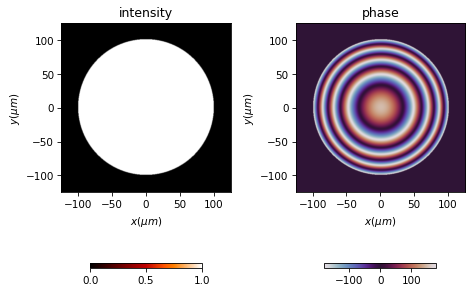

In [10]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

f1 = "np.zeros_like(self.X,dtype=float)"
f2 = "R2-h2+np.sqrt(R2**2-(self.X-x0)**2-(self.Y-y0)**2)"
v_globals = {
    "R1": 5 * mm,
    "R2": 1 * mm,
    "x0": 0 * um,
    "y0": 0 * um,
    "h1": 1 * mm,
    "h2": -1 * mm,
    "np": np,
}
index = 1.5

t1 = Scalar_mask_XY(x, y, wavelength)
t1.mask_from_function(
    r0=(0 * um, 0 * um),
    index=index,
    f1=f1,
    f2=f2,
    v_globals=v_globals,
    radius=(100 * um, 100 * um),
)
t1.draw(kind="field")

focal = v_globals["R2"] / (index - 1)

## Insert_array_masks
The mask is repited in x-y axis separated a certain distance

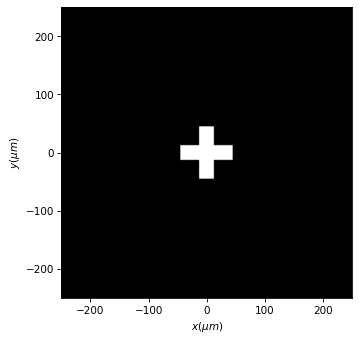

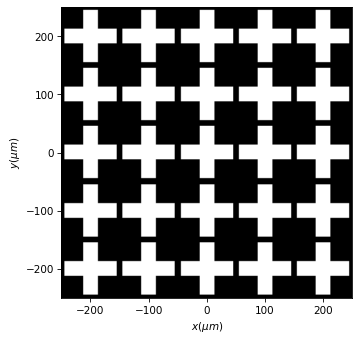

In [11]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 1 * um

s = Scalar_mask_XY(x, y, wavelength)
s.cross(r0=(0 * um, 0 * um), size=(90 * um, 25 * um), angle=0 * degrees)
s.draw()

t1 = Scalar_mask_XY(x, y, wavelength)
num_points = t1.insert_array_masks(
    t1=s, space=[100 * um, 100 * um], margin=50 * um, angle=90 * degrees
)
t1.draw(kind="intensity")

In [12]:
print(s)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 1.00 um
 - date:       2025-05-07_20_55_27



In [13]:
print(t1)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 180.00 deg
 - wavelength: 1.00 um
 - date:       2025-05-07_20_55_27



## repeat_structure

The mask si repeated (n,m) times. The size of the new mask is (n,m) times greater.

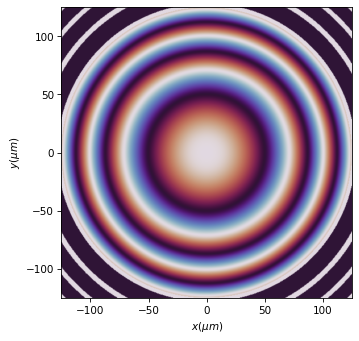

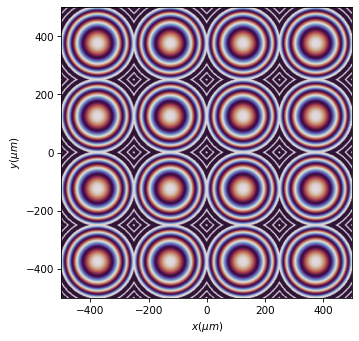

In [ ]:
size = 250 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

wavelength = 0.6328 * um

focal = 4 * mm
lenslet = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lenslet.lens(r0=(0 * um, 0 * um), radius=size / 2, focal=focal)
lenslet.draw("phase")

lens_array = lenslet.repeat_structure(
    num_repetitions=(4, 4), position="center", new_field=True
)
lens_array.draw("phase", percentage_intensity=0.1)

In [15]:
print(lenslet)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um,  Dx:   0.49 um
 - ymin:       -125.00 um,  ymax:      125.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.93 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2025-05-07_20_55_27



In [16]:
print(lens_array)

Scalar_mask_XY
 - x:  (2048,),   y:  (2048,),   u:  (2048, 2048)
 - xmin:       -500.00 um,  xmax:      500.00 um,  Dx:   0.49 um
 - ymin:       -500.00 um,  ymax:      500.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.93 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2025-05-07_20_55_27



## Get area of the mask

area: 100.17 um^2


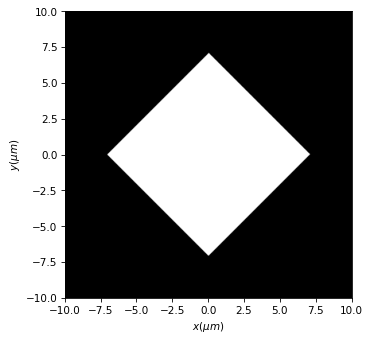

In [17]:
x = np.linspace(-10*um, 10*um, 1000)
y = np.linspace(-10*um, 10*um, 1000)

target = Scalar_mask_XY(x,y, wavelength)
target.square(r0=(0, 0), size=10*um, angle=45*degrees)
target.draw()

area=target.area(percentage=0, verbose=True)

## Get mask size

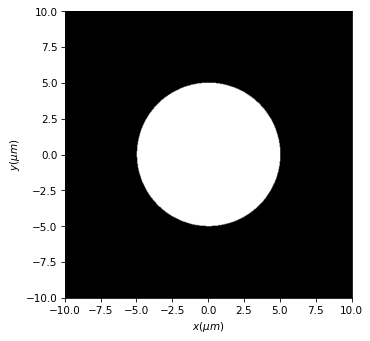

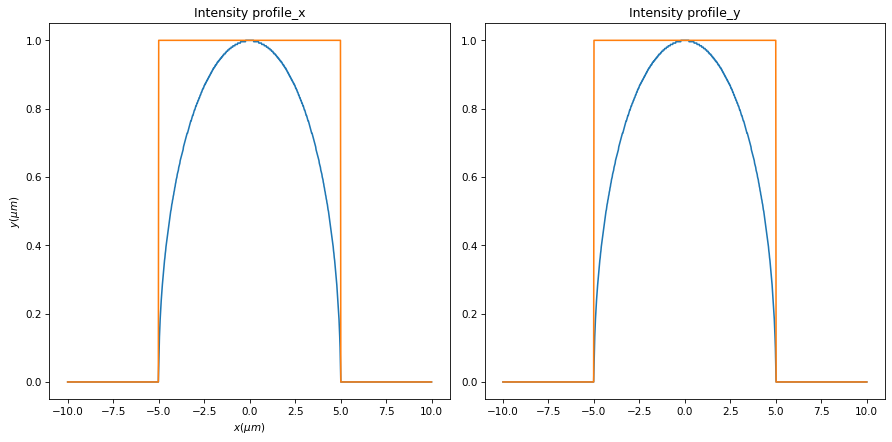

mask size: 9.99 um, 9.99 um


In [18]:
x = np.linspace(-10*um, 10*um, 1000)
y = np.linspace(-10*um, 10*um, 1000)

target = Scalar_mask_XY(x,y, wavelength)
target.circle(r0=(0, 0), radius=5*um)
target.draw()

target.get_mask_size(threshold=0.001, has_draw=True, verbose=True)